In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.ioff()

- Data is stored in an array of size (4 x n_sessions)
- The first axis represents the 4 players, and the 2nd each session
- Summing along the first axis will give how many sessions that player has DMed for example
- the indices are in the same order as we roll for DM
    - Sam, Will, Peter, Fergus

In [5]:
# add a new row to this everytime there's a session, then rerun this notebook
DM_data = np.array([
[0,1,0,1], 
[0,0,1,1],
[1,1,0,0],
[1,0,1,0],
[0,1,1,0], # Session 5
[0,2,0,0],
[1,0,1,0],
[0,1,0,0],
[1,0,0,0],
[1,1,0,0], # Session 10
[0,0,0,2],
[0,0,1,0],
[0,1,0,0],
[0,0,0,1],
[1,0,0,0], # Session 15
[0,1,0,0],
[0,1,0,0],
[1,0,0,0],
[0,1,0,0], 
[0,0,0,1], # Session 20
[0,0,0,1],
[0,0,1,0],
[1,0,0,0],
[1,0,1,0],
[0,0,1,1], # Session 25
[1,0,0,1],
[1,1,0,0],
[0,0,1,0],
[1,0,0,1],
[1,0,0,0], # Session 30
[0,0,1,0],
[0,1,0,1],
[0,0,0,1],
[0,1,0,0],
[1,0,0,0], # Session 35
[0,0,0,1],
[0,1,0,0],
[1,0,0,0],
[0,0,1,0],
[0,1,0,0], # Session 40
[0,0,1,0],
[1,0,0,0],
[0,0,0,1], # Intermission 1
[0,1,0,0],
[0,0,1,0],
[1,0,0,0]]) # Session 45

In [6]:
total_sessions = np.sum(DM_data)
individual_totals = np.sum(DM_data, axis = 0)
percentages = np.around(individual_totals/total_sessions * 100, 1)

print(f"Up to date percentages: Sam {percentages[0]}%, Will {percentages[1]}%, Peter {percentages[2]}%, Fergus {percentages[3]}%")

cumulative_sessions_run = np.cumsum(DM_data, axis = 0)
running_sessions = np.cumsum(np.sum(DM_data, axis = 1))

# the running_sessions[:, None] makes the division possible by adding a new axis to the array
cumulative_percentages = np.around(cumulative_sessions_run/running_sessions[:, None] * 100, 1)
print(f"Cumulative percentage table: \n {cumulative_percentages}")

Up to date percentages: Sam 27.9%, Will 27.9%, Peter 21.3%, Fergus 23.0%
Cumulative percentage table: 
 [[ 0.  50.   0.  50. ]
 [ 0.  25.  25.  50. ]
 [16.7 33.3 16.7 33.3]
 [25.  25.  25.  25. ]
 [20.  30.  30.  20. ]
 [16.7 41.7 25.  16.7]
 [21.4 35.7 28.6 14.3]
 [20.  40.  26.7 13.3]
 [25.  37.5 25.  12.5]
 [27.8 38.9 22.2 11.1]
 [25.  35.  20.  20. ]
 [23.8 33.3 23.8 19. ]
 [22.7 36.4 22.7 18.2]
 [21.7 34.8 21.7 21.7]
 [25.  33.3 20.8 20.8]
 [24.  36.  20.  20. ]
 [23.1 38.5 19.2 19.2]
 [25.9 37.  18.5 18.5]
 [25.  39.3 17.9 17.9]
 [24.1 37.9 17.2 20.7]
 [23.3 36.7 16.7 23.3]
 [22.6 35.5 19.4 22.6]
 [25.  34.4 18.8 21.9]
 [26.5 32.4 20.6 20.6]
 [25.  30.6 22.2 22.2]
 [26.3 28.9 21.1 23.7]
 [27.5 30.  20.  22.5]
 [26.8 29.3 22.  22. ]
 [27.9 27.9 20.9 23.3]
 [29.5 27.3 20.5 22.7]
 [28.9 26.7 22.2 22.2]
 [27.7 27.7 21.3 23.4]
 [27.1 27.1 20.8 25. ]
 [26.5 28.6 20.4 24.5]
 [28.  28.  20.  24. ]
 [27.5 27.5 19.6 25.5]
 [26.9 28.8 19.2 25. ]
 [28.3 28.3 18.9 24.5]
 [27.8 27.8 20.4 24.1]

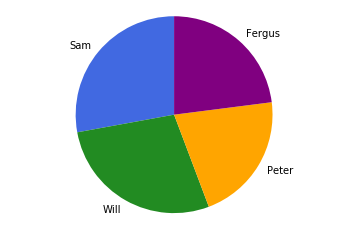

In [7]:
# plot a basic pie chart of total DMing done so far

names = ["Sam", "Will", "Peter", "Fergus"]
colors = ["royalblue", "forestgreen", "orange", "purple"]

fig1, ax1 = plt.subplots()
ax1.pie(percentages, labels = names, colors = colors, startangle = 90)
ax1.axis("equal")
# plt.title(f"Sam {percentages[0]}%, Will {percentages[1]}%, Peter {percentages[2]}%, Fergus {percentages[3]}%")
plt.show()
plt.close()

In [8]:
# now let's try animating it, so it changes by session

## first we need to define a function that updates the pie chart each frame

fig2, ax2 = plt.subplots(figsize = (8,4))

def UpdatePie(session_number):
    ax2.clear()
    ax2.axis("equal")
    ax2.pie(cumulative_percentages[session_number], labels = names, colors = colors, startangle = 90)
    ax2.set_title(f"Session #{session_number +1}")
    ax2.legend()

anim = animation.FuncAnimation(fig2, UpdatePie, frames = range(cumulative_percentages.shape[0]), interval = 500, repeat = False)
plt.close()

In [9]:
HTML(anim.to_html5_video())

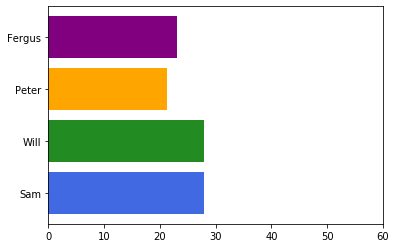

In [11]:
# plot a basic bar chart of total DMing done so far

names = np.array(["Sam", "Will", "Peter", "Fergus"])
colors = ["royalblue", "forestgreen", "orange", "purple"]

fig3, ax3 = plt.subplots()
ax3.barh(names, percentages, color = colors)
ax3.set_xlim([0,60])
plt.show()
plt.close()

In [12]:
# make an updating bar chart

fig4, ax4 = plt.subplots(figsize = (8,4))

def UpdateBar(session_number):
    ax4.clear()
    ax4.barh(names, cumulative_percentages[session_number], color = colors)
    ax4.set_title(f"Session #{session_number +1}")
    ax4.set_xlim([0, 60])

anim2 = animation.FuncAnimation(fig4, UpdateBar, frames = range(cumulative_percentages.shape[0]), interval = 500, repeat = False)
plt.close()

In [13]:
HTML(anim2.to_html5_video())

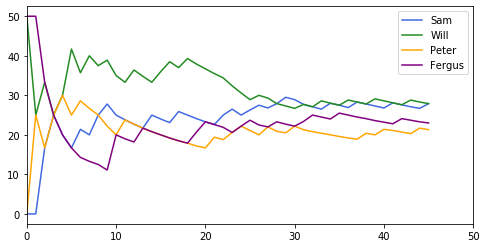

In [15]:
# make a basic line graph

fig5, ax5 = plt.subplots(figsize = (8,4))

for i in range(4):
    ax5.plot(cumulative_percentages[:,i], color = colors[i], label = names[i])
ax5.set_xlim([0,50])
ax5.legend()
plt.show()

In [20]:
# make an updating line graph, stock style

fig6, ax6 = plt.subplots(figsize = (8,4))

def UpdateLine(session_number):
    ax6.clear()
    for i in range(4):
        ax6.plot(cumulative_percentages[0:session_number, i], color = colors[i], label = names[i])
    ax6.set_xlabel(f"Game #{session_number +1}")
    ax6.set_xlim([0, 50])
    ax6.set_ylim([0, 60])
    ax6.legend()
    ax6.set_title("DM Stock Graph")
    
anim3 = animation.FuncAnimation(fig6, UpdateLine, frames = range(cumulative_percentages.shape[0]), interval = 500, repeat = False)
plt.close()

In [21]:
HTML(anim3.to_html5_video())

In [22]:
anim3.save('DM_Line_Chart.mp4', writer = "imagemagick")
anim3.save('DM_Line_Chart.gif', writer = "imagemagick")